In [0]:
#!pip install --upgrade tensorflow

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
   

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!jar xvf "/content/gdrive/My Drive/Dataset.zip"

Streaming output truncated to the last 5000 lines.
 inflated: Dataset/Dress/Dress_471.jpg
 inflated: Dataset/Dress/Dress_472.jpg
 inflated: Dataset/Dress/Dress_473.jpg
 inflated: Dataset/Dress/Dress_474.jpg
 inflated: Dataset/Dress/Dress_475.jpg
 inflated: Dataset/Dress/Dress_476.jpg
 inflated: Dataset/Dress/Dress_477.jpg
 inflated: Dataset/Dress/Dress_478.jpg
 inflated: Dataset/Dress/Dress_479.jpg
 inflated: Dataset/Dress/Dress_480.jpg
 inflated: Dataset/Dress/Dress_481.jpg
 inflated: Dataset/Dress/Dress_482.jpg
 inflated: Dataset/Dress/Dress_483.jpg
 inflated: Dataset/Dress/Dress_484.jpg
 inflated: Dataset/Dress/Dress_485.jpg
 inflated: Dataset/Dress/Dress_486.jpg
 inflated: Dataset/Dress/Dress_487.jpg
 inflated: Dataset/Dress/Dress_488.jpg
 inflated: Dataset/Dress/Dress_489.jpg
 inflated: Dataset/Dress/Dress_490.jpg
 inflated: Dataset/Dress/Dress_491.jpg
 inflated: Dataset/Dress/Dress_492.jpg
 inflated: Dataset/Dress/Dress_493.jpg
 inflated: Dataset/Dress/Dress_494.jpg
 inflated: Da

In [0]:
import matplotlib.pyplot as plt
import os
import cv2


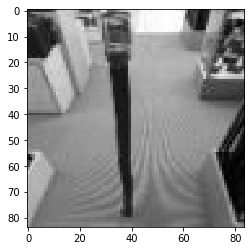

In [5]:
DATADIR = "/content/Dataset"
class_examples = ["Belt","Dress", "High_Heels","Pants","Shirt",
                  "Skirt","Shoes","Slipper","Socks","Specs"]
for category in class_examples:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray') 
    plt.show()  

    break 
  break 
    

In [0]:
from tqdm import tqdm #module that shows the progress bar 

In [0]:
img_size = 84

def create_dataset():
    dataset = []
    for category in class_examples:
        path = os.path.join(DATADIR, category)
        class_num = class_examples.index(category) #assign 0-9 as classification index

        for img in tqdm(os.listdir(path)):
          try:
              img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #convert to array
              new_array = cv2.resize(img_array,(img_size,img_size)) #resize to normalise data size
              dataset.append([new_array, class_num])

          except Exception as e:
            print("error")  #catch exception 
    return dataset


In [8]:
dataset = create_dataset()
X = []
y = []

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.utils import shuffle
import random

for new_array, class_num in dataset:
  X.append(new_array)
  y.append(class_num)

X = np.array(X)
y = np.array(y)

random.seed(80)
np.random.seed(80)
X, y = shuffle(X, y)
#random.shuffle(dataset)


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state = 1) #splitting data into test and training data


  0%|          | 0/612 [00:00<?, ?it/s]

error


  0%|          | 0/604 [00:00<?, ?it/s]

error
error


100%|██████████| 600/600 [00:00<00:00, 10270.26it/s]


In [0]:
import sys 
assert sys.version_info >= (3,5)
import sklearn 
assert sklearn.__version__ >= "0.20"
import numpy as np
import os 
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

In [10]:
import tensorflow as tf 
from tensorflow import keras

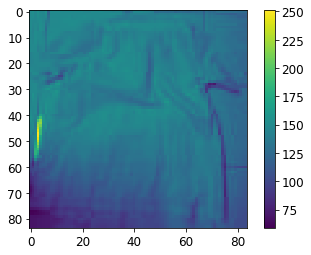

In [11]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
class_examples[y_train[0]]

'Shirt'

In [0]:
X_train = X_train /255.
X_test = X_test/ 255.


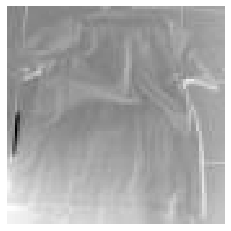

In [14]:
plt.imshow(X_train[0],cmap="binary")
plt.axis('off')
plt.show()

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[84,84]))

In [16]:
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Train on 4907 samples, validate on 546 samples
Epoch 1/100
4907/4907 [==============================] - 1s 194us/sample - loss: 2.1329 - acc: 0.2323 - val_loss: 2.1377 - val_acc: 0.2637
Epoch 2/100
4907/4907 [==============================] - 1s 109us/sample - loss: 1.9193 - acc: 0.3330 - val_loss: 2.1011 - val_acc: 0.2253
Epoch 3/100
4907/4907 [==============================] - 1s 109us/sample - loss: 1.7864 - acc: 0.3880 - val_loss: 1.9364 - val_acc: 0.3132
Epoch 4/100
4907/4907 [==============================] - 1s 110us/sample - loss: 1.6819 - acc: 0.4245 - val_loss: 1.8394 - val_acc: 0.3571
Epoch 5/100
4907/4907 [==============================] - 1s 106us/sample - loss: 1.5887 - acc: 0.4534 - val_loss: 1.8201 - val_acc: 0.3626
Epoch 6/100
4907/4907 [==============================] - 1s 108us/sample - loss: 1.5308 - acc: 0.4779 - val_loss: 1.6388 - val_acc: 0.4158
Epoch 7/100
4907/4907 [==============================] - 1s 105us/sample - loss: 1.4749 - acc: 0.4940 - val_loss: 1.723

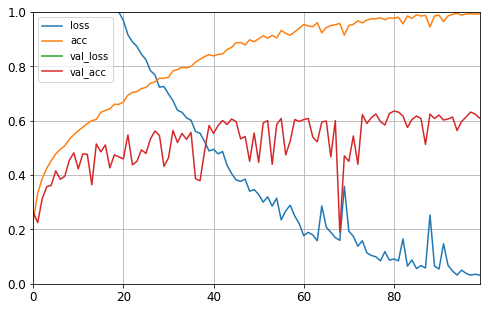

In [19]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\n Test accuracy:', test_acc)

606/606 [==============================] - 0s 84us/sample - loss: 1.5169 - acc: 0.6815

 Test accuracy: 0.68151814


In [21]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.77, 0.  , 0.  , 0.06, 0.13, 0.  , 0.04],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.04, 0.02, 0.83, 0.  , 0.01, 0.02, 0.08],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.  , 0.04, 0.1 , 0.81, 0.  , 0.03, 0.01, 0.  ],
       [0.  , 0.04, 0.  , 0.  , 0.46, 0.32, 0.07, 0.11, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.08, 0.03, 0.02, 0.71],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [22]:
np.argmax(y_proba[0])


3

In [23]:
y_proba[0]

array([3.5284080e-12, 2.6851826e-12, 3.2893556e-06, 7.6806879e-01,
       1.3306522e-04, 3.0584027e-12, 5.9126083e-02, 1.3348867e-01,
       1.1516011e-03, 3.8028453e-02], dtype=float32)

In [24]:
y_pred = model.predict_classes(X_new)
y_pred

array([3, 5, 8, 1, 5, 9, 5, 4, 9, 4])

In [25]:
np.array(class_examples)[y_pred]

array(['Pants', 'Skirt', 'Socks', 'Dress', 'Skirt', 'Specs', 'Skirt',
       'Shirt', 'Specs', 'Shirt'], dtype='<U10')

In [26]:
y_new = y_test[:10]
y_new

array([7, 5, 8, 1, 4, 9, 5, 5, 9, 4])

In [27]:
np.array(class_examples)[y_new]

array(['Slipper', 'Skirt', 'Socks', 'Dress', 'Shirt', 'Specs', 'Skirt',
       'Skirt', 'Specs', 'Shirt'], dtype='<U10')